### KNN Algorithm

The algorithm works by `finding` the k nearest neighbors to the input data point.   
The predicted label is assign based on the `majority` vote of the k-nearest neighbors.  
The nearest neighbor is find using `euclidean` distance between two points.  

$ d(x,y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2} $

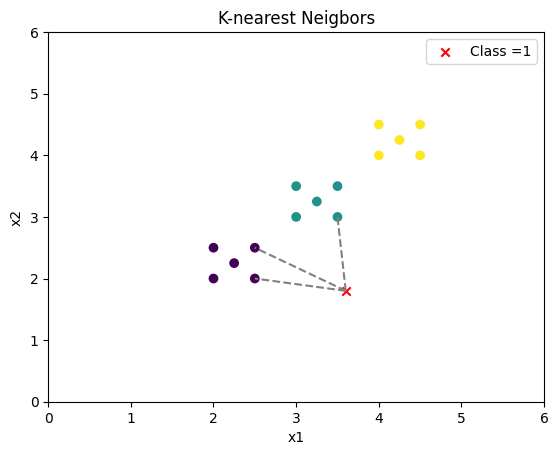

Square distances: [1.61245155 1.74642492 1.30384048 1.11803399 1.42302495 1.34164079
 1.80277564 1.70293864 1.20415946 1.49164339 2.23606798 2.72946881
 2.84604989 2.37697286 2.53475837]
Keys ordered by distances: [ 3  8  2  5  4  9  0  7  1  6 10 13 14 11 12]
Nearest neighbors keys: [3 8 2]
Nearest neighbors targets: [1 2 1]
Algorithm target response: 1
Class prediction for [3.6 1.8] = 1


In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Train dataset
X = np.array([
    [2, 2], [2, 2.5], [2.5, 2.5], [2.5, 2], [2.25, 2.25],
    [3, 3], [3, 3.5], [3.5, 3.5], [3.5, 3], [3.25, 3.25],
    [4, 4], [4, 4.5], [4.5, 4.5], [4.5, 4], [4.25, 4.25],
])
y = np.array([
    1, 1, 1, 1, 1,
    2, 2, 2, 2, 2,
    3, 3, 3, 3, 3,
])
x_unknown = np.array([3.6, 1.8])

# Choose the number of neighbors to be used with the algorithm
k = 3 

# --------------------------------------------------------------

# Square distances (matrix)
SD = np.sqrt(np.sum((X - x_unknown)**2, axis=1))    # Calculate Euclidean distances
keys = np.argsort(SD)                               # Sort distances to find closest points

# Neighbors target (matrix)
keys_knn = keys[:k]                 # Select k-nearest indices
targets_knn = y[keys_knn]           # Get labels of k-nearest neighbors

# Optim target
most_common = np.bincount(targets_knn)      # Count occurrences of each label
knn_class = most_common.argmax()            # Predict most common label

# --------------------------------------------------------------

# Plot the point and lines to th k neighbors
fig, ax = plt.subplots()
ax.set_xlabel('x1')
ax.set_ylabel('x2')

# Plot training data points with respective labels
z = x_unknown
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(z[0], z[1], marker='x', color='r', label='Class =%s' %knn_class)

# Plot dashed lines between unknown point and its k-nearest neighbors
for i in keys_knn:
    plt.plot((z[0], X[i][0]), (z[1], X[i][1]), color='gray', linestyle='--')

plt.title('K-nearest Neigbors')
plt.xlim(0, 6)
plt.ylim(0, 6)
plt.legend()
plt.show()

# Output informations
print("Square distances:", SD)
print("Keys ordered by distances:", keys)
print("Nearest neighbors keys:", keys_knn)
print("Nearest neighbors targets:", targets_knn)
print("Algorithm target response:", knn_class)
print("Class prediction for", x_unknown, "=", knn_class)